In [25]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 487.6 kB/s eta 0:00:30
   ---------------------------------------- 0.1/14.3 MB 751.6 kB/s eta 0:00:19
    --------------------------------------- 0.2/14.3 MB 1.7 MB/s eta 0:00:09
   - -------------------------------------- 0.5/14.3 MB 2.6 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/14.3 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/14.3 MB 4.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/14.3 MB 5.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/14.3 MB 5.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/14.3 MB 6.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.6/14.3 MB 7.7 MB/s eta 0:00:02
   ------------ --------------------------- 4.4/14.3 MB 8.7 MB/s eta 0:00:02
   ------

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Connect to MySQL Database
cnx = mysql.connector.connect(
        host='127.0.0.1',
        user='queryispassword',
        password='query',
        db='nzdata'
    )

In [14]:
# When finished with query close connection

cnx.close()

    Year Male Cancer Rate / 100,000 Female Cancer Rate / 100,000
0   1948                   218.9848                     155.5388
1   1949                   213.8472                     175.1184
2   1950                   211.8428                     164.9514
3   1951                   211.3018                     176.3714
4   1952                   210.4965                     186.2455
..   ...                        ...                          ...
64  2012                   545.8174                     458.9870
65  2013                   547.0192                     464.0897
66  2014                   556.5385                     477.1892
67  2015                   543.2798                     479.2245
68  2016                   553.1181                     488.9313

[69 rows x 3 columns]
Year                               int64
Male Cancer Rate / 100,000        object
Female Cancer Rate / 100,000      object
Male Cancer Rate / 100,000f      float64
Female Cancer Rate / 100,000f    

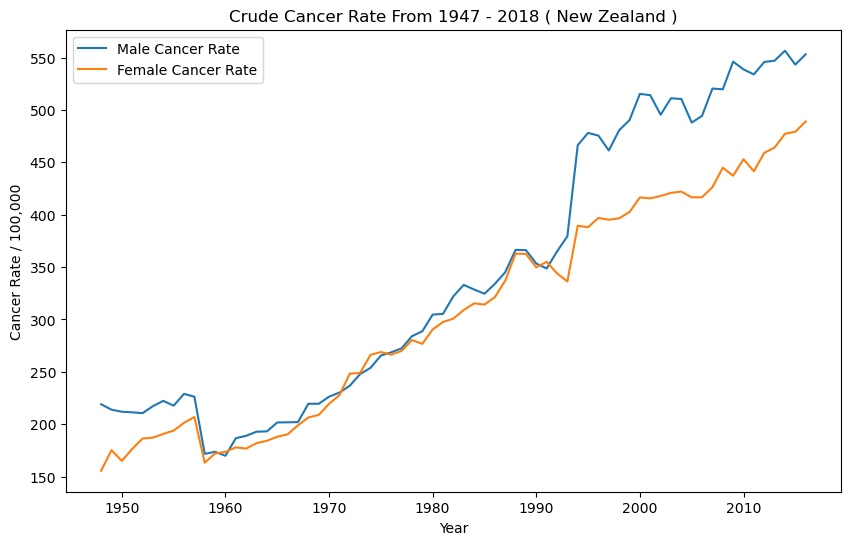

In [20]:
## Crude cancer rates / 100,000 in New Zealand

cursor = cnx.cursor()

query = "SELECT `year`,CAST(`crude male cancer rate / 100,000` AS CHAR(20)), CAST(`crude female cancer rate / 100,000` AS CHAR(20)) FROM cancersummary WHERE `year` < 2017"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Male Cancer Rate / 100,000','Female Cancer Rate / 100,000']
print(df)
df['Male Cancer Rate / 100,000f'] = df['Male Cancer Rate / 100,000'].astype(float)
df['Female Cancer Rate / 100,000f'] = df['Female Cancer Rate / 100,000'].astype(float)

print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Male Cancer Rate / 100,000f'], label = 'Male Cancer Rate')
plt.plot(df['Year'], df['Female Cancer Rate / 100,000f'], label = 'Female Cancer Rate')
plt.xlabel('Year')
plt.ylabel('Cancer Rate / 100,000')
plt.title('Crude Cancer Rate From 1947 - 2018 ( New Zealand )')
plt.legend()
plt.show()

    Year Age-Standardised male cancer rate / 100,000  \
0   1948                                         223   
1   1949                                         218   
2   1950                                         218   
3   1951                                         222   
4   1952                                         216   
..   ...                                         ...   
65  2013                                         364   
66  2014                                         368   
67  2015                                         358   
68  2016                                         360   
69  2017                                         363   

   Age-Standardised female cancer rate / 100,000  \
0                                            150   
1                                            169   
2                                            157   
3                                            169   
4                                            177   
..             

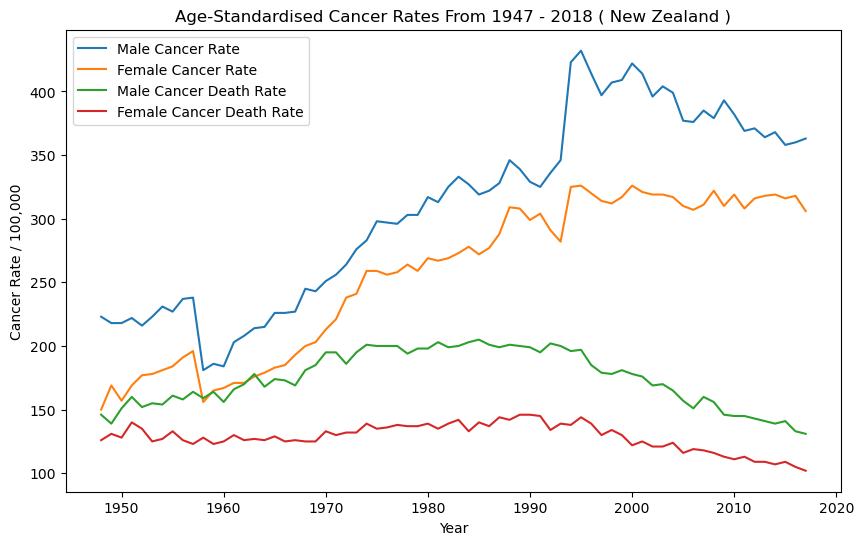

In [24]:
## Crude cancer rates / 100,000 in New Zealand

cursor = cnx.cursor()

query = "SELECT `year`,CAST(`Age-Standardised male cancer rate / 100,000` AS CHAR(20)), CAST(`Age-Standardised female cancer rate / 100,000` AS CHAR(20)), CAST(`Age-Standardised male cancer death rate / 100,000` AS CHAR(20)), CAST(`Age-Standardised female cancer death rate / 100,000` AS CHAR(20)) FROM cancersummary WHERE `year` < 2018"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Age-Standardised male cancer rate / 100,000','Age-Standardised female cancer rate / 100,000','Age-Standardised male cancer death rate / 100,000','Age-Standardised female cancer death rate / 100,000']
print(df)
df['Age-Standardised male cancer rate / 100,000f'] = df['Age-Standardised male cancer rate / 100,000'].astype(float)
df['Age-Standardised female cancer rate / 100,000f'] = df['Age-Standardised female cancer rate / 100,000'].astype(float)
df['Age-Standardised male cancer death rate / 100,000f'] = df['Age-Standardised male cancer death rate / 100,000'].astype(float)
df['Age-Standardised female cancer death rate / 100,000f'] = df['Age-Standardised female cancer death rate / 100,000'].astype(float)

print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Age-Standardised male cancer rate / 100,000f'], label = 'Male Cancer Rate')
plt.plot(df['Year'], df['Age-Standardised female cancer rate / 100,000f'], label = 'Female Cancer Rate')
plt.plot(df['Year'], df['Age-Standardised male cancer death rate / 100,000f'], label = 'Male Cancer Death Rate')
plt.plot(df['Year'], df['Age-Standardised female cancer death rate / 100,000f'], label = 'Female Cancer Death Rate')
plt.xlabel('Year')
plt.ylabel('Cancer Rate / 100,000')
plt.title('Age-Standardised Cancer Rates From 1947 - 2018 ( New Zealand )')
plt.legend()
plt.show()

    Year  Total Population  Female Population  Male Population
0   1948           1853900             923242           930658
1   1949           1888123             936509           951614
2   1950           1911608             948158           963450
3   1951           1952124             967277           984847
4   1952           1998948             988480          1010468
..   ...               ...                ...              ...
71  2019           4959034            2516095          2442939
72  2020           5061133            2565913          2495220
73  2021           5129727            2602027          2527700
74  2022           5185288            2631265          2554023
75  2023           5228100            2640541          2587559

[76 rows x 4 columns]
Year                 int64
Total Population     int64
Female Population    int64
Male Population      int64
dtype: object


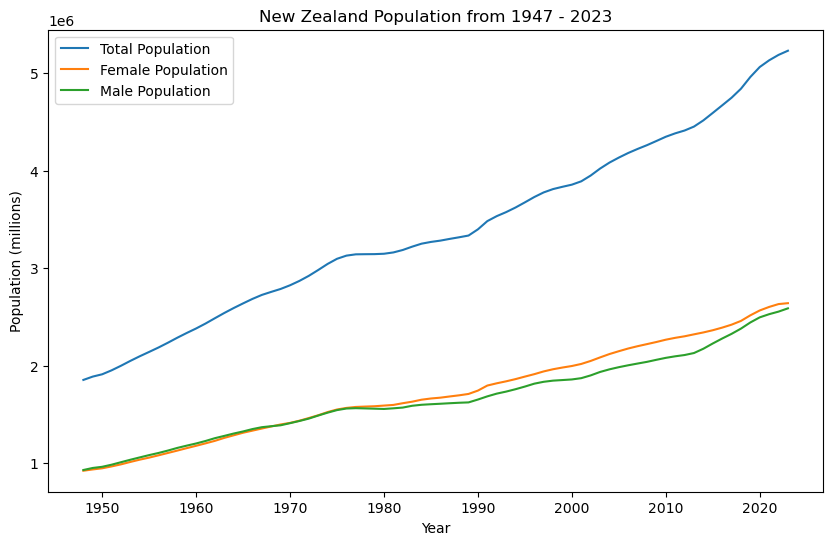

In [22]:
# New Zealand population growth, including male and female population numbers

cursor = cnx.cursor()

query = "SELECT `pyear`,`population`, `female`, `male` FROM `population`"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Total Population','Female Population','Male Population']
print(df)
#df['Male Cancer Rate / 100,000f'] = df['Male Cancer Rate / 100,000'].astype(float)
#df['Female Cancer Rate / 100,000f'] = df['Female Cancer Rate / 100,000'].astype(float)

print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Total Population'], label = 'Total Population')
plt.plot(df['Year'], df['Female Population'], label = 'Female Population')
plt.plot(df['Year'], df['Male Population'], label = 'Male Population')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('New Zealand Population from 1947 - 2023')
plt.legend()
plt.show()

    Year Total Deaths Female Deaths Male Deaths
0   1948        17295          7716        9579
1   1949        17589          8025        9564
2   1950        19449          8751       10698
3   1951        20211          9012       11199
4   1952        20370          9237       11133
..   ...          ...           ...         ...
71  2019        34530         16806       17724
72  2020        32829         15795       17034
73  2021        35202         17031       18171
74  2022        38775         18894       19881
75  2023        38094         18384       19710

[76 rows x 4 columns]
Year              int64
Total Deaths     object
Female Deaths    object
Male Deaths      object
dtype: object


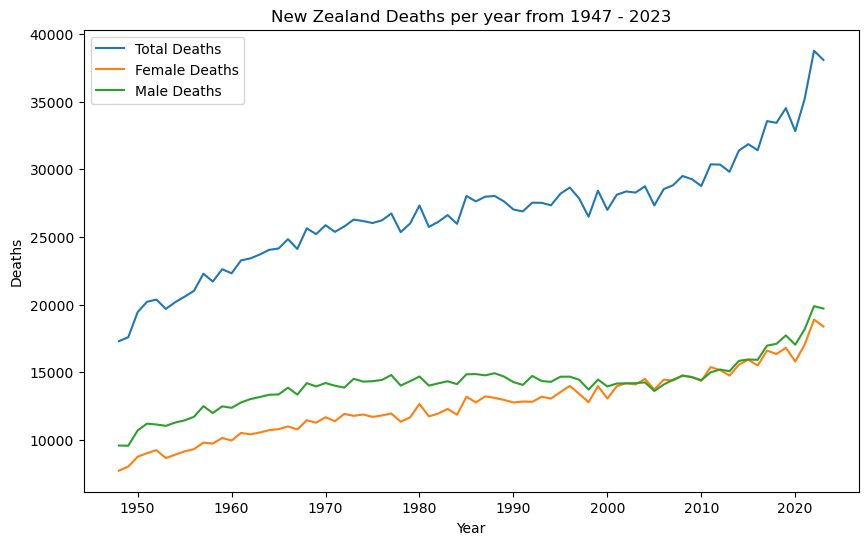

In [26]:
cursor = cnx.cursor()

query = "SELECT `Year`,`total deaths`, `female deaths`, `male deaths` FROM `deathtotal`"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Total Deaths','Female Deaths','Male Deaths']
print(df)

print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Total Deaths'], label = 'Total Deaths')
plt.plot(df['Year'], df['Female Deaths'], label = 'Female Deaths')
plt.plot(df['Year'], df['Male Deaths'], label = 'Male Deaths')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('New Zealand Deaths per year from 1947 - 2023')
plt.legend()
plt.show()

   Year   Asian  European/Other   Maori  Pacific
0  2012  498800         2943080  684180   282000
1  2013  481780         2942910  692260   285800
2  2014  555260         2952800  714040   294370
3  2015  602960         2964690  738580   303170
4  2016  655410         2981300  765240   312190
5  2017  658350         2998620  791440   321390
6  2018  744480         3009080  816470   330580
7  2019  780080         3027670  832420   339000
8  2020  817100         3065800  852450   354820
9  2021  816150         3062170  872490   360570
Year              int64
Asian             int64
European/Other    int64
Maori             int64
Pacific           int64
dtype: object


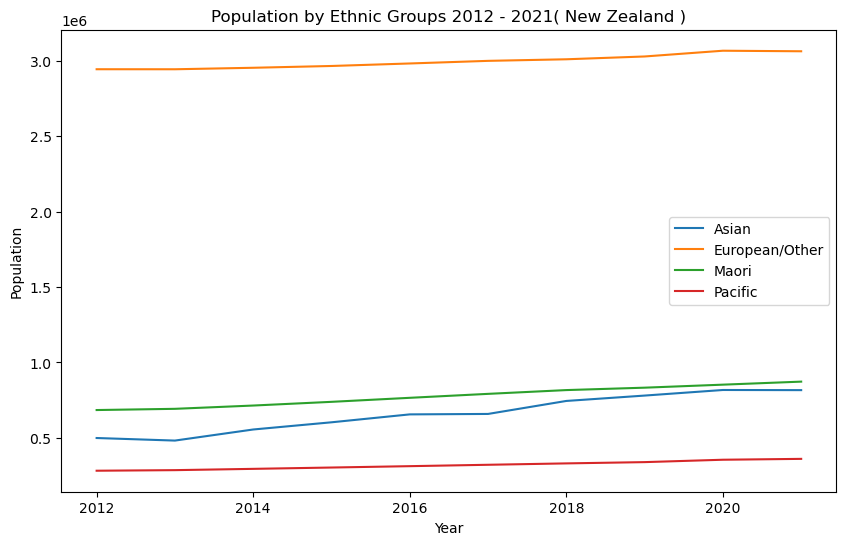

In [8]:
# Population by Ethnic Group 2012-2021

cursor = cnx.cursor()

query = "SELECT `year`,`Asian`,`European/Other`,`Maori`,`Pacific` FROM ethnicPopulations"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Asian','European/Other','Maori','Pacific']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Asian'], label = 'Asian')
plt.plot(df['Year'], df['European/Other'], label = 'European/Other')
plt.plot(df['Year'], df['Maori'], label = 'Maori')
plt.plot(df['Year'], df['Pacific'], label = 'Pacific')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Ethnic Groups 2012 - 2021( New Zealand )')
plt.legend()
plt.show()

    Year  Maori serious non-fatal  Maori fatal  general serious non-fatal  \
0   2000                   6.6444      13.8160                     3.6157   
1   2001                   5.4648      13.3932                     3.3309   
2   2002                   3.2023      13.4273                     2.8466   
3   2003                   4.1459      14.4279                     2.8304   
4   2004                   5.2217      17.9856                     3.2276   
5   2005                   5.1098      17.0012                     2.6348   
6   2006                   5.7151      17.2481                     3.1427   
7   2007                   6.8702      15.2586                     3.2213   
8   2008                   5.5204      13.1263                     3.0999   
9   2009                   7.1513      12.1303                     3.6603   
10  2010                   6.7276      14.5488                     3.7975   
11  2011                   4.6368      15.9658                     3.8072   

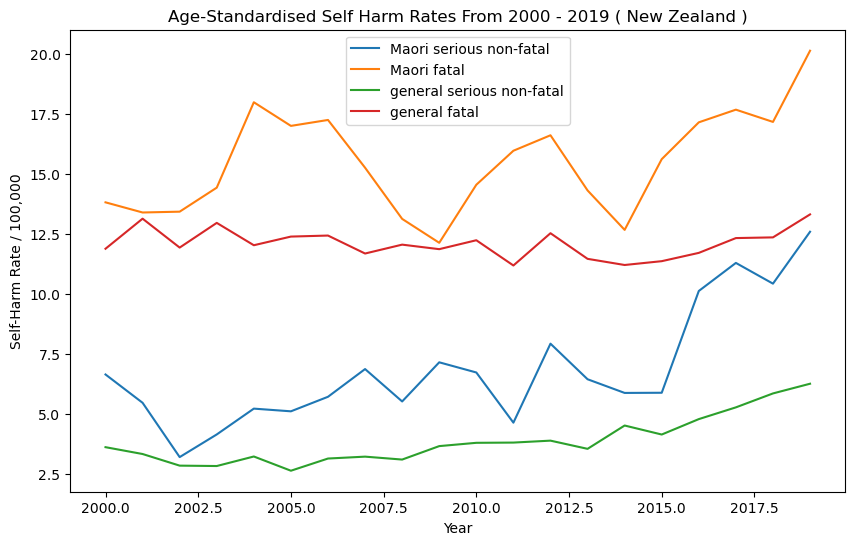

In [10]:
cursor = cnx.cursor()

query = "SELECT m.`year`,ROUND(m.`serious` - m.`fatal`,4) AS `Maori serious non-fatal`, m.`fatal` AS `Maori fatal`, ROUND(s.`serious` - s.`fatal`,4) AS `general serious non-fatal`, s.`fatal` AS `general fatal`  FROM selfharmmaori m JOIN selfharm s ON m.`year` = s.`year`;"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Maori serious non-fatal','Maori fatal','general serious non-fatal','general fatal']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Maori serious non-fatal'], label = 'Maori serious non-fatal')
plt.plot(df['Year'], df['Maori fatal'], label = 'Maori fatal')
plt.plot(df['Year'], df['general serious non-fatal'], label = 'general serious non-fatal')
plt.plot(df['Year'], df['general fatal'], label = 'general fatal')
plt.xlabel('Year')
plt.ylabel('Self-Harm Rate / 100,000')
plt.title('Age-Standardised Self Harm Rates From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()



    Year  Drownings
0   2000    2.88835
1   2001    2.38965
2   2002    3.03449
3   2003    2.68143
4   2004    2.46792
5   2005    2.40411
6   2006    1.79964
7   2007    1.87756
8   2008    2.42413
9   2009    2.41217
10  2010    1.65727
11  2011    2.24236
12  2012    1.73733
13  2013    2.23407
14  2014    1.62856
15  2015    1.89743
16  2016    2.08520
17  2017    2.24123
18  2018    1.64110
19  2019    1.88473
Year          object
Drownings    float64
dtype: object


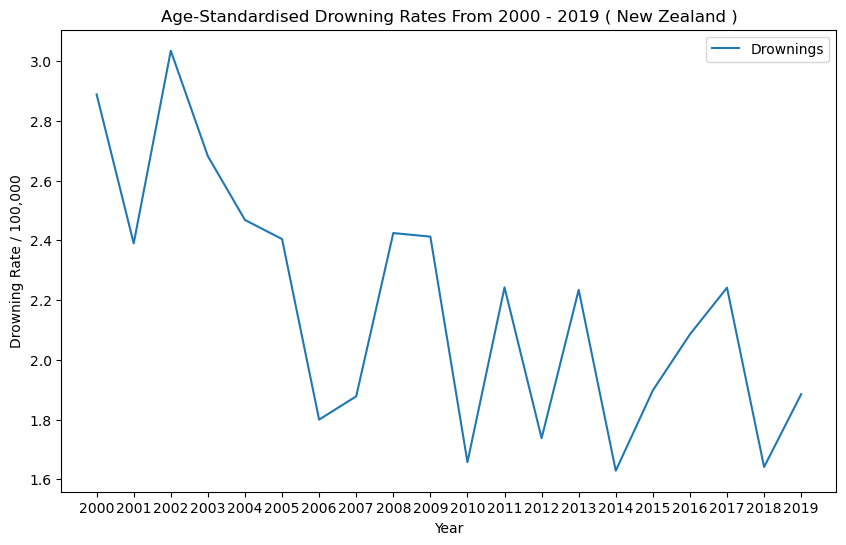

In [8]:
cursor = cnx.cursor()

query = "SELECT `period`, `data value` FROM seriousinjurymaster WHERE `severity` = 'Fatal' AND `indicator` = 'Age-standardised rate' AND `type` = 'Single year' AND `cause` = 'Drowning' AND `population` = 'whole pop' AND `age` = 'All ages' AND `validation` = 'validated';"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Drownings']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Drownings'], label = 'Drownings')
plt.xlabel('Year')
plt.ylabel('Drowning Rate / 100,000')
plt.title('Age-Standardised Drowning Rates From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()


    Year  Assaults
0   2000  1.465330
1   2001  1.354010
2   2002  1.776640
3   2003  1.440030
4   2004  1.199460
5   2005  1.704250
6   2006  1.552800
7   2007  1.267190
8   2008  1.257610
9   2009  1.989070
10  2010  1.253870
11  2011  1.229790
12  2012  1.302580
13  2013  1.181540
14  2014  1.005750
15  2015  1.261120
16  2016  1.238200
17  2017  0.815446
18  2018  1.281620
19  2019  2.454730
Year         object
Assaults    float64
dtype: object


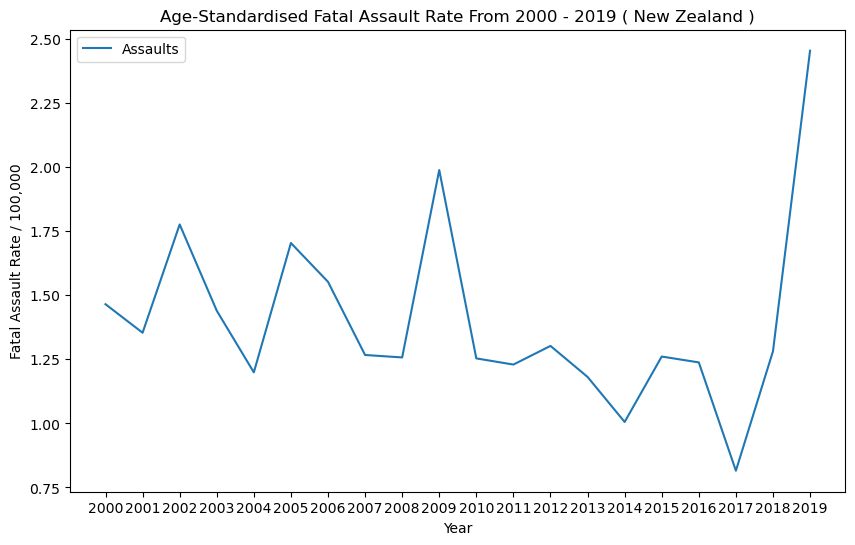

In [8]:
cursor = cnx.cursor()

query = "SELECT `period`, `data value` FROM seriousinjurymaster WHERE `severity` = 'Fatal' AND `indicator` = 'Age-standardised rate' AND `type` = 'Single year' AND `cause` = 'Assault' AND `population` = 'whole pop' AND `age` = 'All ages' AND `validation` = 'validated';"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Assaults']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Assaults'], label = 'Assaults')
plt.xlabel('Year')
plt.ylabel('Fatal Assault Rate / 100,000')
plt.title('Age-Standardised Fatal Assault Rate From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()

    Year     Falls
0   2000   6.74382
1   2001   7.55573
2   2002   7.74105
3   2003   8.36706
4   2004   8.66068
5   2005   7.77589
6   2006   8.69491
7   2007   9.29642
8   2008  10.20330
9   2009   9.48073
10  2010  10.62940
11  2011   9.68993
12  2012   9.88467
13  2013   8.94171
14  2014   9.79659
15  2015   9.58596
16  2016   9.30191
17  2017   9.63544
18  2018  10.69360
19  2019  11.37200
Year      object
Falls    float64
dtype: object


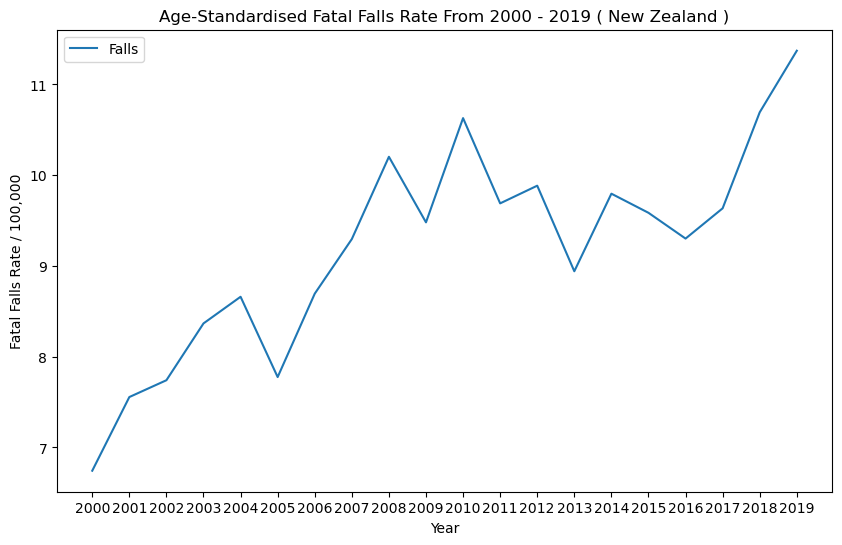

In [8]:
cursor = cnx.cursor()

query = "SELECT `period`, `data value` FROM seriousinjurymaster WHERE `severity` = 'Fatal' AND `indicator` = 'Age-standardised rate' AND `type` = 'Single year' AND `cause` = 'Falls' AND `population` = 'whole pop' AND `age` = 'All ages' AND `validation` = 'validated';"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Falls']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Falls'], label = 'Falls')
plt.xlabel('Year')
plt.ylabel('Fatal Falls Rate / 100,000')
plt.title('Age-Standardised Fatal Falls Rate From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()

    Year  Motor Vehicle Crashes
0   2000               11.47570
1   2001               11.38470
2   2002               10.71030
3   2003               11.54510
4   2004               10.65740
5   2005                9.73280
6   2006                9.26170
7   2007               10.06640
8   2008                8.49175
9   2009                9.10811
10  2010                8.63892
11  2011                6.50430
12  2012                7.16025
13  2013                5.52591
14  2014                6.17596
15  2015                6.68650
16  2016                6.75246
17  2017                7.71794
18  2018                7.43246
19  2019                7.16672
Year                      object
Motor Vehicle Crashes    float64
dtype: object


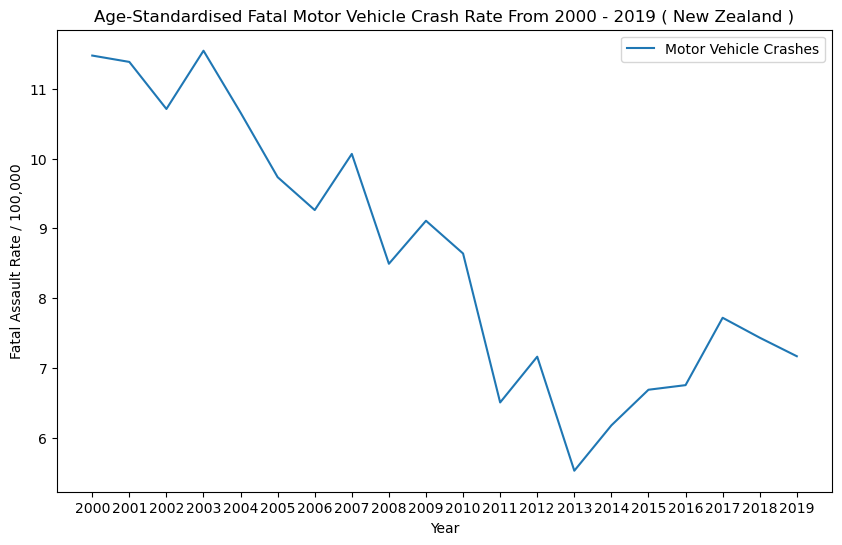

In [6]:
cursor = cnx.cursor()

query = "SELECT `period`, `data value` FROM seriousinjurymaster WHERE `severity` = 'Fatal' AND `indicator` = 'Age-standardised rate' AND `type` = 'Single year' AND `cause` = 'Motor vehicle traffic crashes' AND `population` = 'whole pop' AND `age` = 'All ages' AND `validation` = 'validated';"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Motor Vehicle Crashes']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Motor Vehicle Crashes'], label = 'Motor Vehicle Crashes')
plt.xlabel('Year')
plt.ylabel('Fatal Assault Rate / 100,000')
plt.title('Age-Standardised Fatal Motor Vehicle Crash Rate From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()

    Year  Data
0   2000  78.0
1   2001  62.0
2   2002  66.0
3   2003  65.0
4   2004  46.0
5   2005  58.0
6   2006  57.0
7   2007  51.0
8   2008  34.0
9   2009  41.0
10  2010  48.0
11  2011  39.0
12  2012  32.0
13  2013  37.0
14  2014  46.0
15  2015  41.0
16  2016  36.0
17  2017  40.0
18  2018  41.0
19  2019  34.0
Year     object
Data    float64
dtype: object


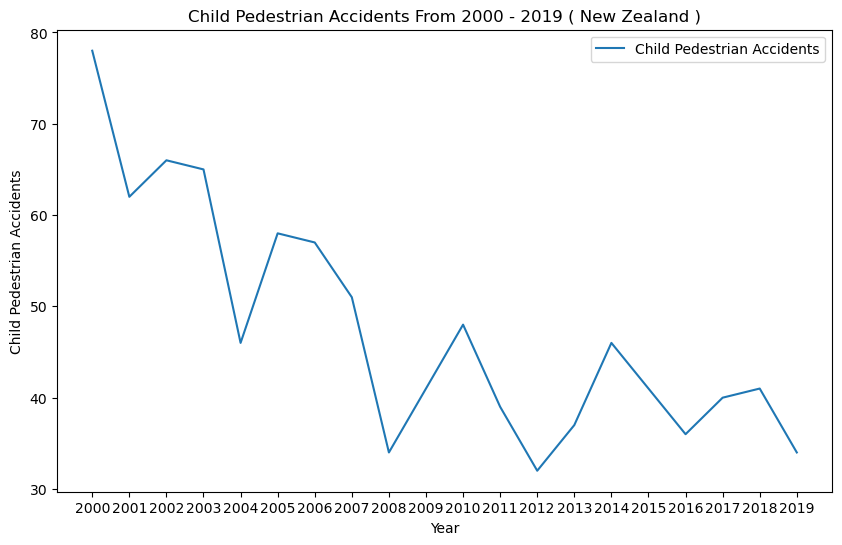

In [22]:
cursor = cnx.cursor()

query = "SELECT `period`, `data value` FROM seriousinjurymaster WHERE `severity` = 'Serious' AND `indicator` = 'Number' AND `type` = 'Single year' AND `cause` = 'Pedestrian' AND `validation` = 'validated';"
cursor.execute(query)
   
result = cursor.fetchall()

#for row in result:
#    print(result)
cursor.close()

df = pd.DataFrame(result)
df.columns = ['Year','Data']
print(df)


print(df.dtypes)

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Data'], label = 'Child Pedestrian Accidents')
plt.xlabel('Year')
plt.ylabel('Child Pedestrian Accidents')
plt.title('Child Pedestrian Accidents From 2000 - 2019 ( New Zealand )')
plt.legend()
plt.show()